<a href="https://colab.research.google.com/github/sai061996/k8s31may22/blob/main/salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle

In [25]:
dataset = pd.read_csv('/salaries.csv')
x = dataset.iloc[1, :-1]
y = dataset.iloc[1, -1]


In [26]:
from sklearn.model_selection import train_test_split


In [27]:
dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


# New Section

In [28]:
dataset.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [20]:
dataset.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [29]:
dataset["work_year"].value_counts()

work_year
2023    8519
2024    6067
2022    1655
2021     218
2020      75
Name: count, dtype: int64

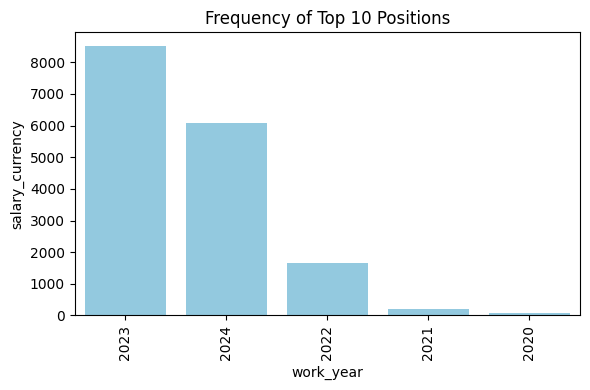

In [33]:
top_10_positions = dataset['work_year'].value_counts().head(10)
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='work_year', order=top_10_positions.index, color='skyblue')
plt.title('Frequency of Top 10 Positions')
plt.xlabel('work_year')
plt.ylabel('salary_currency')
plt.xticks(rotation=90)
plt.tight_layout()

In [35]:
dataset["experience_level"].value_counts()

experience_level
SE    10670
MI     4038
EN     1325
EX      501
Name: count, dtype: int64

In [37]:
mapping = {
    'SE': 0,
    'MI': 1,
    'EN': 2,
    'EX': 3,
}

dataset['experience_level'] = dataset['experience_level'].map(mapping)

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

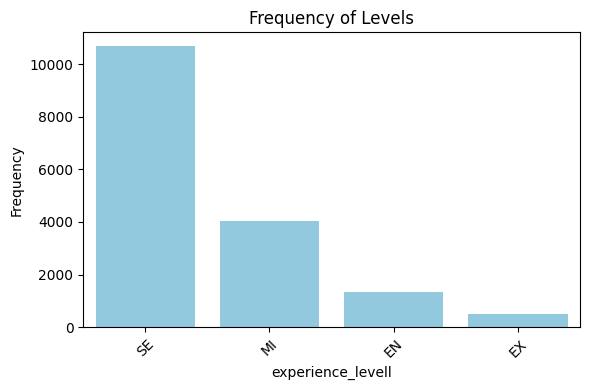

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='experience_level', order=dataset['experience_level'].value_counts().index, color="skyblue")
plt.title('Frequency of Levels')
plt.xlabel('experience_levell')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xticks(ticks=[0, 1, 2, 3], labels=['SE', 'MI', 'EN', 'EX'])
plt.tight_layout()


plt.savefig('frequency_of_levels.png')

plt.show()


In [43]:
dataset.employment_type.value_counts().head()

employment_type
FT    16454
PT       38
CT       28
FL       14
Name: count, dtype: int64

In [44]:
dataset['known_employment_type'] = dataset['employment_type'].apply(lambda x: len(x.split(';')))

In [45]:
dataset.drop('employment_type', axis=1, inplace=True)

In [49]:
dataset["job_title"].value_counts()

job_title
Data Engineer                    3464
Data Scientist                   3314
Data Analyst                     2440
Machine Learning Engineer        1705
Research Scientist                531
                                 ... 
Quantitative Research Analyst       1
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Applied Research Scientist          1
Name: count, Length: 155, dtype: int64

In [53]:
mapping = {
    '0 - 1 Yıl': 0,
    '1 - 3 Yıl': 1,
    '3 - 5 Yıl': 2,
    '5 - 7 Yıl': 3,
    '7 - 10 Yıl': 4,
    '10 - 12 Yıl': 5,
    '12 - 14 Yıl': 6,
    '15 Yıl ve üzeri': 7
}

# Map the experience categories to the scale
dataset['job_title'] = dataset['job_title'].map(mapping)

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt              #visualisation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set(color_codes=True)

In [56]:
df = pd.read_csv("/salaries.csv")
# To display the top 5 rows
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [57]:
df.tail(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
16533,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [58]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [59]:
df.shape

(16534, 11)

In [60]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (6421, 11)


In [61]:
df.drop_duplicates(inplace=True)
df.shape

(10113, 11)

In [62]:
df.count()

work_year             10113
experience_level      10113
employment_type       10113
job_title             10113
salary                10113
salary_currency       10113
salary_in_usd         10113
employee_residence    10113
remote_ratio          10113
company_location      10113
company_size          10113
dtype: int64

In [63]:
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [64]:
df['work_year'].value_counts()

work_year
2023    4632
2024    4074
2022    1116
2021     216
2020      75
Name: count, dtype: int64

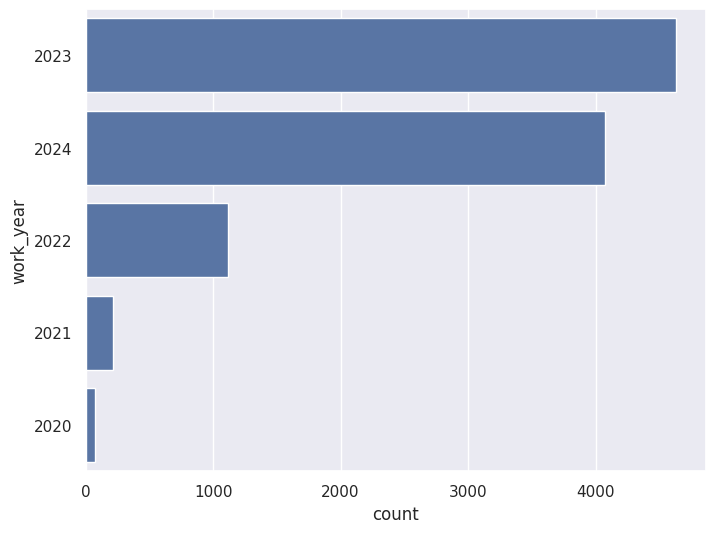

In [65]:
plt.figure(figsize=(8,6))
ax=sns.countplot(y="work_year",data=df,order=df.work_year.value_counts().index[0:15])

In [66]:
df['salary_currency'].value_counts()

salary_currency
USD    9072
GBP     482
EUR     385
CAD      55
INR      55
AUD      12
CHF       8
PLN       7
SGD       6
BRL       5
DKK       4
JPY       4
TRY       3
HUF       3
ILS       2
NOK       2
THB       2
NZD       1
PHP       1
ZAR       1
HKD       1
MXN       1
CLP       1
Name: count, dtype: int64

In [67]:
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder(categories=[['SE','MI','EN','EX'],['FT','PT','CT','FL'],['L','M','S']])

In [68]:
df[['experience_level','employment_type','company_size']]= oe.fit_transform(df[['experience_level','employment_type','company_size']])

In [69]:
df['experience_level'].value_counts()

experience_level
0.0    5950
1.0    2761
2.0    1011
3.0     391
Name: count, dtype: int64

In [72]:
from sklearn.preprocessing import LabelEncoder
label_en= LabelEncoder()
df['job_title']= label_en.fit_transform(df['job_title'])
df['employee_residence']= label_en.fit_transform(df['employee_residence'])
df['company_location']= label_en.fit_transform(df['company_location'])

In [73]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,0.0,0.0,2,202730,USD,202730,84,0,74,1.0
1,2024,0.0,0.0,2,92118,USD,92118,84,0,74,1.0
2,2024,0.0,0.0,57,130500,USD,130500,84,0,74,1.0
3,2024,0.0,0.0,57,96000,USD,96000,84,0,74,1.0
4,2024,0.0,0.0,120,190000,USD,190000,84,0,74,1.0


In [74]:
df.drop(['salary','salary_currency'], axis = 1, inplace = True)

In [75]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,0.0,0.0,2,202730,84,0,74,1.0
1,2024,0.0,0.0,2,92118,84,0,74,1.0
2,2024,0.0,0.0,57,130500,84,0,74,1.0
3,2024,0.0,0.0,57,96000,84,0,74,1.0
4,2024,0.0,0.0,120,190000,84,0,74,1.0


In [76]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,0.0,0.0,2,202730,84,0,74,1.0
1,2024,0.0,0.0,2,92118,84,0,74,1.0
2,2024,0.0,0.0,57,130500,84,0,74,1.0
3,2024,0.0,0.0,57,96000,84,0,74,1.0
4,2024,0.0,0.0,120,190000,84,0,74,1.0


sns.boxplot(x=df['salary_in_usd'])

<Axes: xlabel='salary_in_usd'>

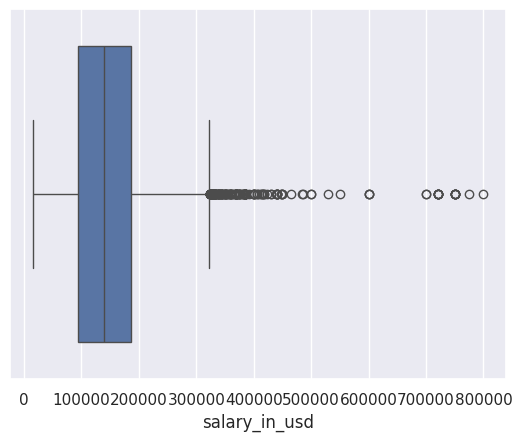

In [78]:
sns.boxplot(x=df['salary_in_usd'])

In [80]:
percentile25=df["salary_in_usd"].quantile(0.25)
percentile75=df["salary_in_usd"].quantile(0.75)
iqr=percentile75 - percentile25
iqr
upper_limit=percentile75 + 1.5*iqr # UPPER LIMIT
lower_limit=percentile25 - 1.5*iqr # LOWER LIMIT
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)
new_df_cap = df.copy()

new_df_cap["salary_in_usd"]= np.where(
    new_df_cap["salary_in_usd"] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap["salary_in_usd"] < lower_limit,
        lower_limit,
        new_df_cap["salary_in_usd"]
    )

)
df['salary_in_usd'] = new_df_cap['salary_in_usd']

upper_limit 322250.0
lower_limit -41350.0


<Axes: xlabel='salary_in_usd'>

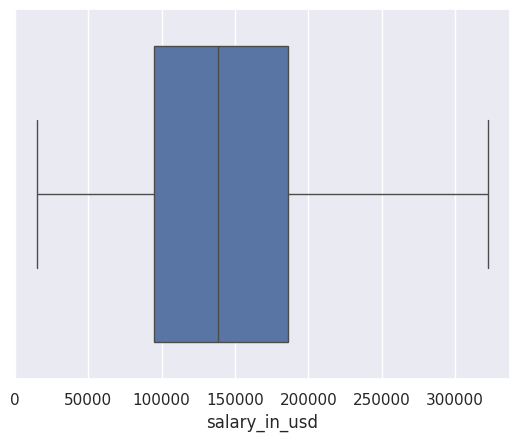

In [81]:
sns.boxplot(x=df['salary_in_usd'])

<Axes: xlabel='remote_ratio'>

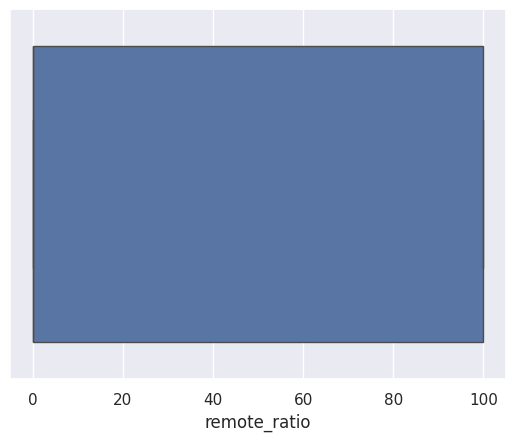

In [82]:
sns.boxplot(x=df['remote_ratio'])

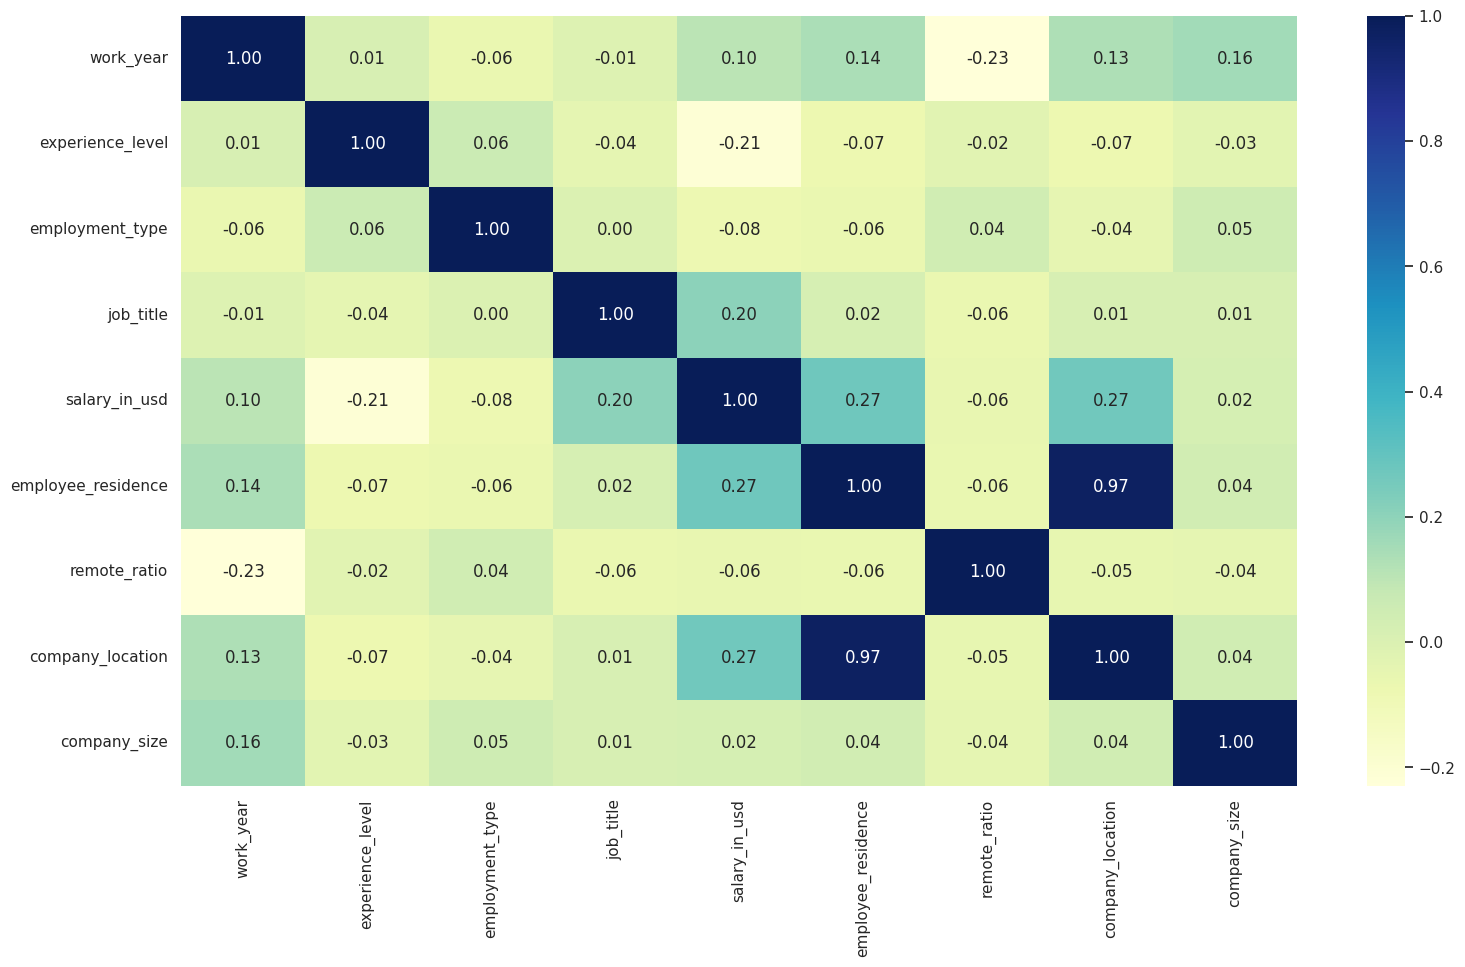

In [83]:
plt.subplots(figsize=(18, 10))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

In [84]:
df.drop(['company_location'], axis = 1, inplace = True)

In [85]:
x = df.drop('salary_in_usd', axis = 1) # grabs everything else but 'salary_in_usd'
y = df['salary_in_usd'] # y is the column we're trying to predict

In [86]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size
0,2024,0.0,0.0,2,202730.0,84,0,1.0
1,2024,0.0,0.0,2,92118.0,84,0,1.0
2,2024,0.0,0.0,57,130500.0,84,0,1.0
3,2024,0.0,0.0,57,96000.0,84,0,1.0
4,2024,0.0,0.0,120,190000.0,84,0,1.0


In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_transform,y,test_size=0.3,random_state=101)

In [88]:
x_transform

array([[ 0.98613275, -0.7173682 , -0.0816748 , ...,  0.43209041,
        -0.75284285,  0.15911959],
       [ 0.98613275, -0.7173682 , -0.0816748 , ...,  0.43209041,
        -0.75284285,  0.15911959],
       [ 0.98613275, -0.7173682 , -0.0816748 , ...,  0.43209041,
        -0.75284285,  0.15911959],
       ...,
       [-4.12024744,  1.71874483, -0.0816748 , ...,  0.43209041,
         1.36466507,  3.69577095],
       [-4.12024744,  1.71874483, 12.06504989, ...,  0.43209041,
         1.36466507, -3.37753178],
       [-2.84365239, -0.7173682 , -0.0816748 , ..., -1.48154035,
         0.30591111, -3.37753178]])

In [110]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
regressor = mean_squared_error()

regressor.fit(y_test, Y_true)
y_pred= regressor.predict(y_test)
print('Linear Regression Model')
print('--'*30)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

TypeError: mean_squared_error() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [92]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

NameError: name 'y_pred' is not defined

In [100]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(X_test)

DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Decision Tree Regression : ',DTr)

Decision Tree Regression :  3118603598.827682


In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(X_test)
RFr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Random Forest Regression : ',RFr)

Random Forest Regression :  2825156144.5990324


In [111]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf_regressor = GradientBoostingRegressor()
rf_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(X_test)

#Random Forest Regression Accuracy with test set
GBr = mean_squared_error(y_pred_rf,y_test)
print('Gradient Boosting Regression : ',GBr)

Gradient Boosting Regression :  2679540555.9940453
